In [1]:
from dotenv import load_dotenv
load_dotenv(override=True)

True

In [4]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
import uuid

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = OpenAI()
nest_asyncio.apply()

@traceable(run_type="chain")
def generate_response(question: str):
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable(run_type="chain")
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable(run_type="chain")
def langsmith_rag(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

#  A simple chatbot without chat history
def chat_bot():
    thread_id=uuid.uuid4() # uuid for everytime this function gets executed
    while True:
        question=input("Enter your question: ")
        if question == "exit":
            break
        response = langsmith_rag(question, langsmith_extra={"metadata": {"thread_id": thread_id}})
        print(response)
        print()

chat_bot()



I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?

Of course! I'd be happy to help you with your assignment. Please provide the details or specific questions you have, and I'll do my best to assist you.

In the heart of Noida, where dreams take flight,  
Stands Shiv Nadar University, a beacon of light.  
With knowledge as its foundation, and innovation its creed,  
It nurtures young minds, planting the seed.  

Amidst sprawling greens and modern design,  
Scholars and thinkers in harmony align.  
From engineering marvels to arts that inspire,  
Each student ignites their own inner fire.  

Professors as mentors, guiding the way,  
Encouraging questions, come what may.  
In labs and in classrooms, ideas intertwine,  
Creating a future where brilliance will shine.  

With a spirit of inquiry, collaboration in hand,  
Together they strive, a united band.  
Cultural fests and sports, a vibrant scene,  
Building friendship

### Lets have a look in Langsmith

All our methods were traced:

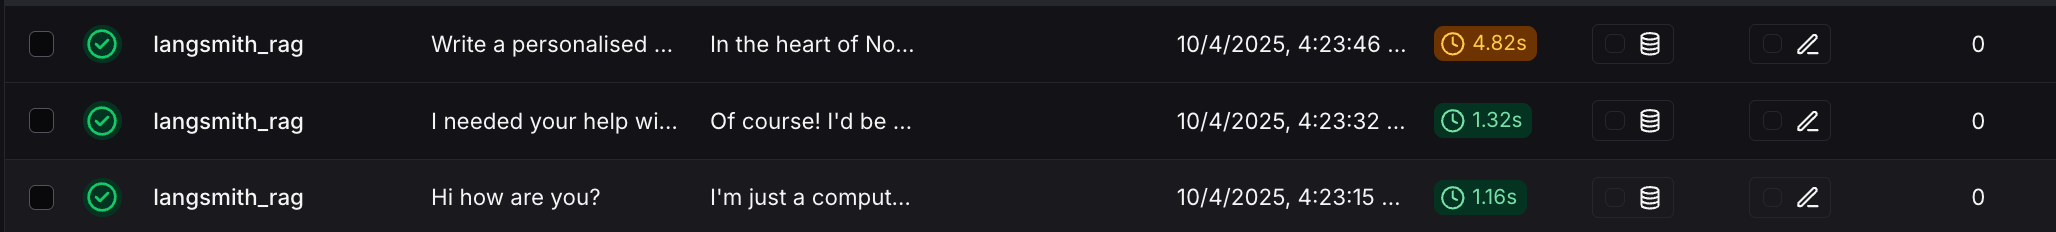

Metadata for each trace where we can see the thread_id feild:

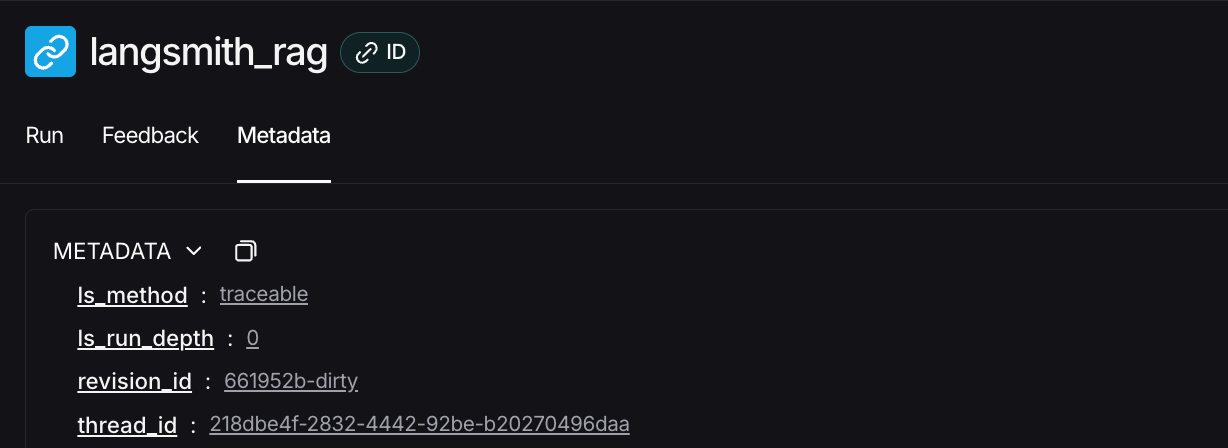

Now lets have a look with the threads interface:

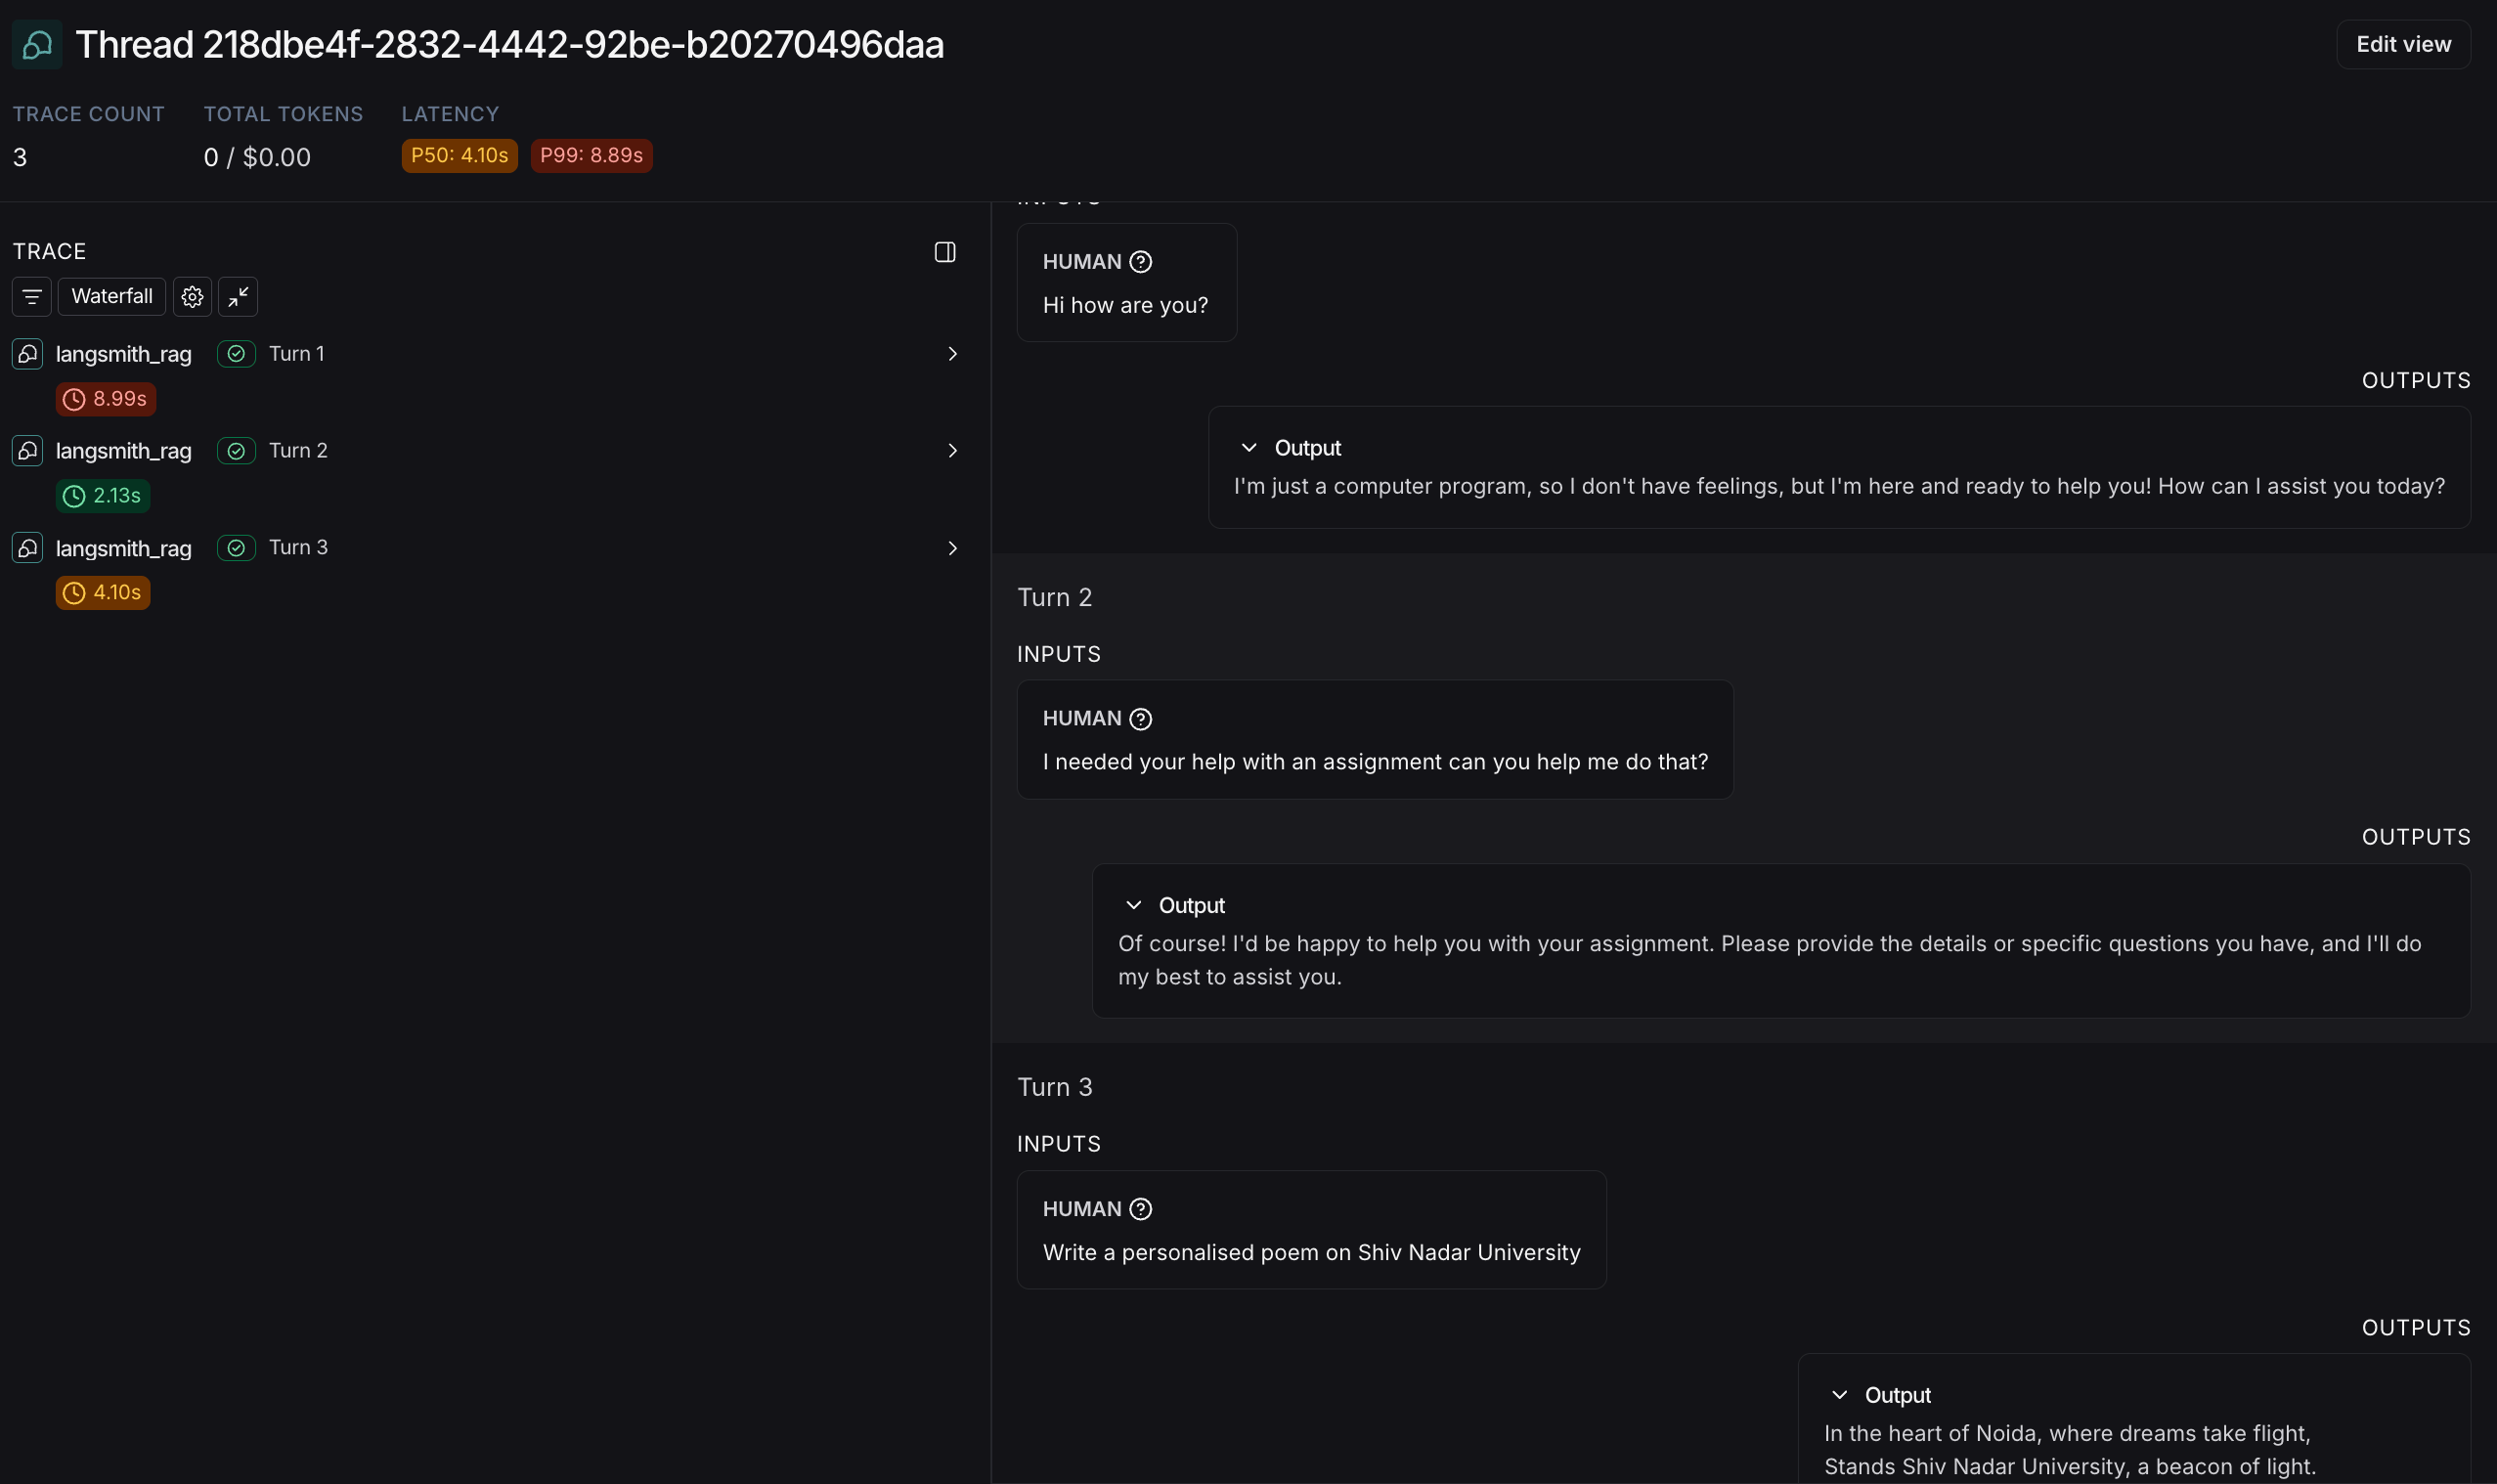

We can also look into each individual trace:

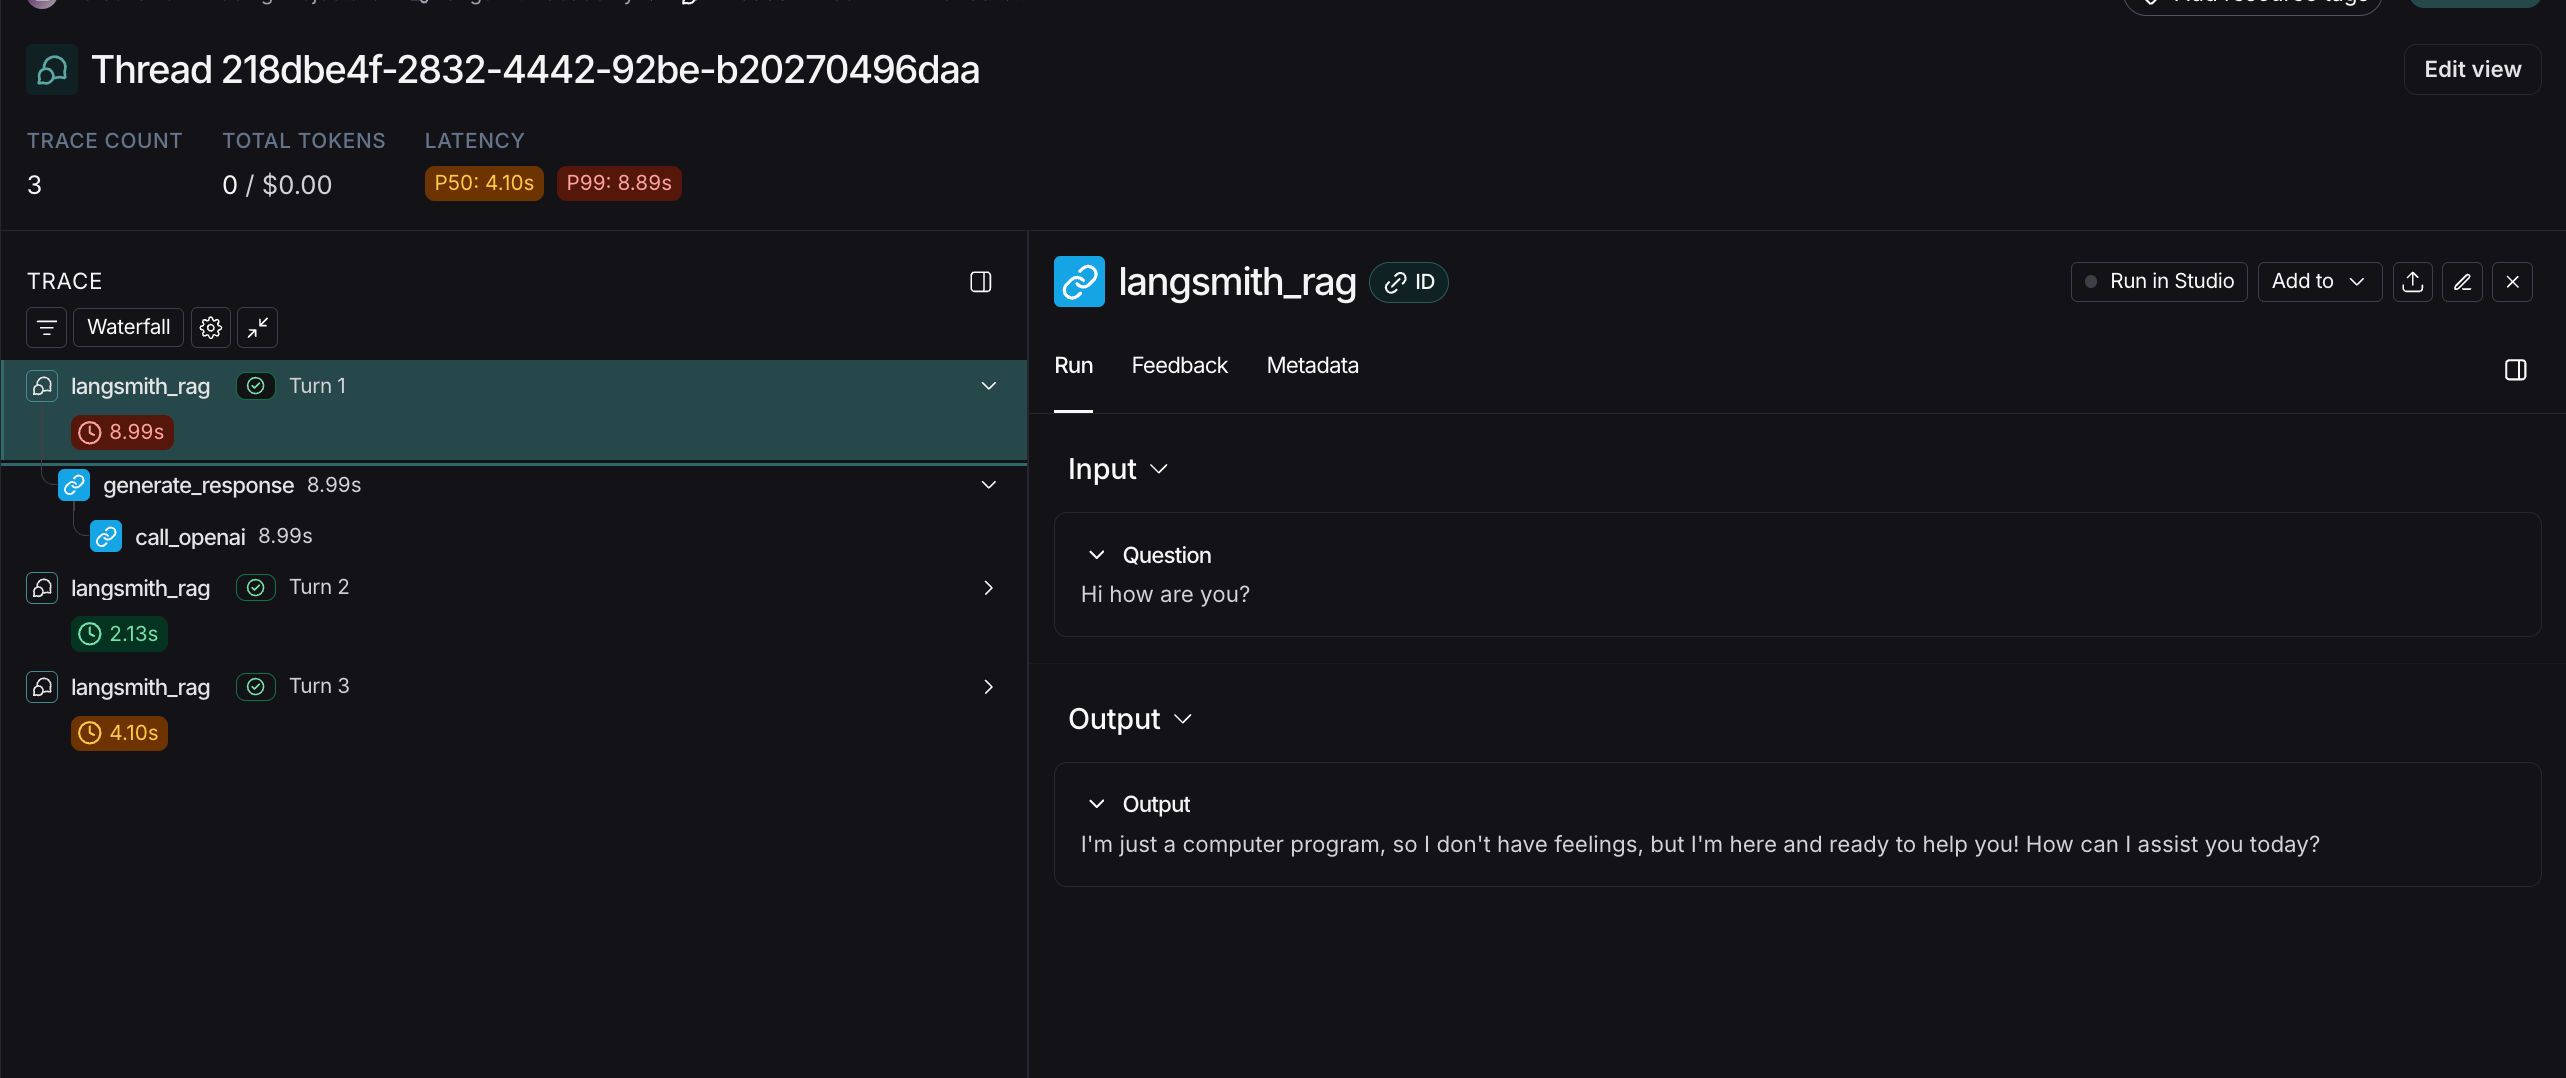